In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')
%matplotlib inline

In [102]:
#df = open('c:\R\Data_literacy\preprocessing_data.csv','rt',encoding = 'utf-8')
df = pd.read_csv('c:\R\Data_literacy\preprocessing_data.csv')

In [17]:
df
print(df.shape)

(598, 15)


In [15]:
df.head(2)

,title,published_at,published_time,published_year,published_month,published_day,month_upload_count,duration,view_count,likes,dislikes,comment_count,description,tags,comments
0,100kg 20회 실화?!?? 아이템 착용,2021-05-31,12,2021,5,31,4,37,973,25.0,2.0,12.0,아이템전....,"벤치프레스,스트렝스,경돼 벤치프레스,100kg,벤치프레스100kg,benchpres...","['형님영상보고 5X5X5 루틴하고있는데\n5,5,5가 효과가 더있나요 아니면 많이..."
1,"벤치 120kg, 도와ㅜ줘 도와ㅜ줘!!",2021-05-30,22,2021,5,30,4,43,1487,33.0,0.0,21.0,출근 전 벤치프레스,"벤치프레스,Benchpress,스트렝스,경돼",['손바닥 전체적으로 미시나요?\n자신만의 포인트좀 공유부탁드려요.\n 상당히 안정...


In [103]:
df.rename(columns = {'published_at':'date',
                     'published_year':'year',
                     'published_month':'month',
                    'published_day':'day'},inplace = True)
df#598,15
df.isnull().sum()

title                 0
date                  0
published_time        0
year                  0
month                 0
day                   0
month_upload_count    0
duration              0
view_count            0
likes                 1
dislikes              1
comment_count         1
description           2
tags                  7
comments              0
dtype: int64

In [107]:
#데이터 전처리
#iloc 는 숫자형 인덱스만 받아주고 loc는 문자형 인덱스도 받아줌 > ?
#tags,description,comments 삭제
df2 = df.drop(["tags","description","comments"],axis =1)
#1)경돼님이 댓글기능 막으셔서 좋아요 및 싫어요 NA처리 행 제거
df2 = df2.dropna(axis=0)
df2#597,12 > 댓글 막은 1개의 행 삭제

,title,date,published_time,year,month,day,month_upload_count,duration,view_count,likes,dislikes,comment_count
0,100kg 20회 실화?!?? 아이템 착용,2021-05-31,12,2021,5,31,4,37,973,25.0,2.0,12.0
1,"벤치 120kg, 도와ㅜ줘 도와ㅜ줘!!",2021-05-30,22,2021,5,30,4,43,1487,33.0,0.0,21.0
2,출근 전 벤치프레스 100kg,2021-05-26,22,2021,5,26,4,42,2042,31.0,3.0,17.0
3,궁금했던 것 물어보면 딱 좋은 타이밍!,2021-05-14,2,2021,5,14,4,210,2011,67.0,2.0,16.0
4,비아냥 속에서도 묵묵히 최선을 다할 것.,2021-04-25,2,2021,4,25,1,13,5501,127.0,7.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
593,All round Workouts (전신운동) 07,2016-05-16,9,2016,5,16,13,461,464,11.0,0.0,19.0
594,"SixpackShortCuts (스쿼트, 어깨운동, 일상) 05",2016-05-12,14,2016,5,12,13,346,1127,16.0,1.0,5.0
595,Body transformation without diet in 3months,2016-05-09,6,2016,5,9,13,209,12163,74.0,6.0,21.0
596,스모데드리프트 (Sumo Deadlifts) 02,2016-05-08,13,2016,5,8,13,214,3218,29.0,0.0,12.0


In [110]:
#interest_rate 변수 생성
df2['interest_rate'] = (df2['likes']+df2['dislikes']+df2['comment_count'])/df2['view_count']
df2['total_interest'] = df2['likes']+df2['dislikes']+df2['comment_count']
#변수추가 이유 : likes, dislikes, comment_ct와 view_count의 상관관계가 유의함을 알 수 있다.from 상관관계
#따라서 세 변수를 하나로 통합하여 interest라는 변수로 처리하였다.
print(df2.shape) #변수 두개 추가 완료

(597, 14)


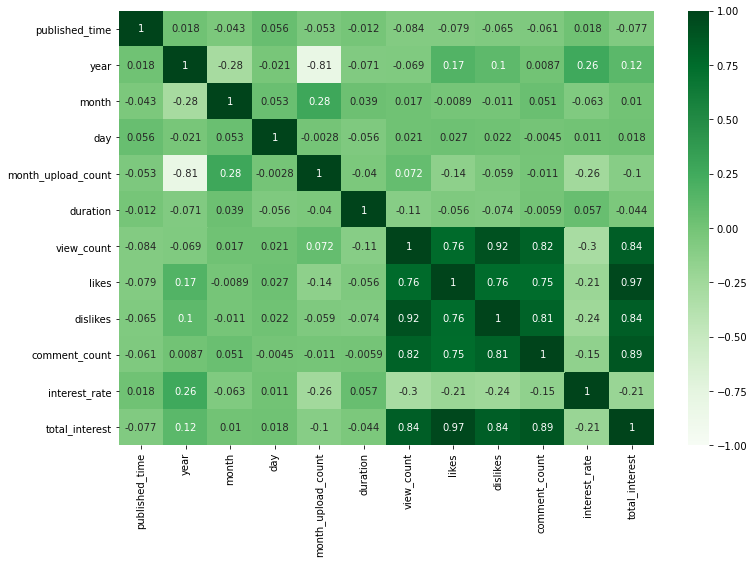

In [111]:
a = df2.drop(['title','date'],axis = 1).corr()
#plt.figure(figsize = (12,8))
#sns.heatmap(a,vmin=-1,vmax=1,annot = True)
plt.rcParams["figure.figsize"] = (12,8)
sns.heatmap(a,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
)

In [90]:
from scipy import stats
#상관관계 view_ct & interest_rate 유의미함.
stats.pearsonr(df2.view_count, df2.interest_rate)

(-0.2958045569941663, 2.3299999193034625e-13)

In [91]:
#상관관계 view_ct & total_interest 유의미함.
stats.pearsonr(df2.view_count,df2.total_interest)

(0.8434204182584297, 1.6092111185541056e-160)

In [94]:
#상관관계 total_interest & interest_rate 유의미함.
stats.pearsonr(df2.total_interest,df2.interest_rate)

(-0.20951333409054873, 2.882087198070738e-07)

In [93]:
#상관관계 view_count & duration 유의미함.
stats.pearsonr(df2.view_count,df2.duration)

(-0.11350435537116084, 0.0058202648808780505)

In [112]:
#상관관계 vies_count & month_upload_count 유의미지 않다. >*
#그러나 month_upload_count의 행구성을 주의해서 파악해야한다.
#month별로 카운트되므로 비교할 변수도 month로 묶어줘야 정확한 상관관계 파악 가능.
stats.pearsonr(df2.view_count,df2.month_upload_count)

(0.07203026674247316, 0.07865333306187942)

In [200]:
mt_upload_ct = df2.loc[:,['year','month','month_upload_count']].groupby(['year','month']).mean()
df3 = df2.drop(['title','date','published_time','day','month_upload_count','likes','dislikes','comment_count','duration'],axis =1)
a1 = df3.groupby(['year','month']).agg(['mean','sum'])
a1.columns = ['mt_mean_view','mt_total_view','mean_interest_rate','aa','bb','total_interest']
a1.drop(['aa','bb'],axis=1,inplace = True)

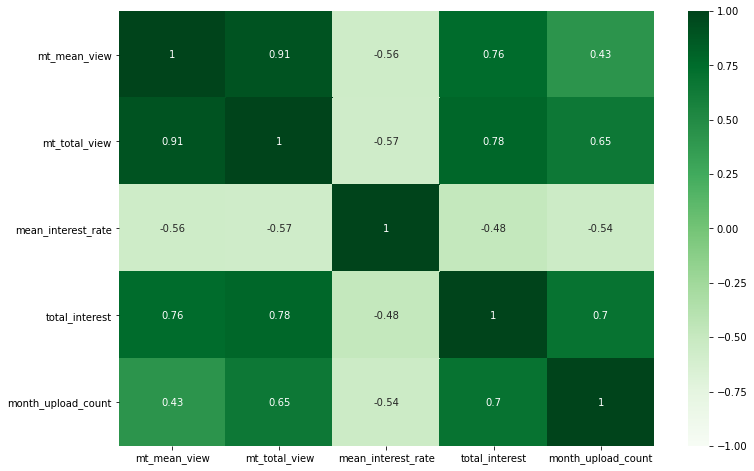

In [201]:
a2 = pd.concat([a1,mt_upload_ct],axis =1)
b = a2.corr()
plt.rcParams["figure.figsize"] = (12,8)
sns.heatmap(b,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
)

In [198]:
#month_upload_count와 month_mean_view 유의함.
stats.pearsonr(a2.month_upload_count,a2.mt_mean_view)

(0.4291061541979072, 0.0007764962517083991)

In [199]:
#month_upload_count와 month_total_view 또한 유의함(상관계수 > 0)
stats.pearsonr(a2.month_upload_count,a2.mt_total_view)

(0.6488329957545577, 3.625240447521998e-08)

In [204]:
#영상업로드와 total_interest 또한 유의미한 상관관계.
stats.pearsonr(a2.month_upload_count,a2.total_interest)
#인사이트1 : 구독자 수 유지 및 상승을 위해서 영상 업로드 횟수를 올리면 된다!
#영상 업로드 횟수가 늘어나면 시청자들의 관심도 높아질 것으로 예상된다.

(0.701443567199202, 8.632200230180649e-10)

In [247]:
a3 = df3.groupby(['year']).agg(['mean','sum'])
a4 = a3.iloc[1:,[2,3,4,7]]
a4.columns = ['yr_mean_view','yr_total_view','mn_interest_rate','tt_interest']
a4

,yr_mean_view,yr_total_view,mn_interest_rate,tt_interest
year,,,,
2017,15155.086022,2818846,0.028180,38980.0
2018,16364.951049,2340188,0.025845,45268.0
2019,8859.737500,708779,0.028132,17843.0
2020,6709.000000,181143,0.037079,4850.0
2021,3249.133333,48737,0.040804,2057.0


In [245]:
#그래프 실패..
sns.barplot(x = 'year', y = "yr_mean_view", data=a3)

ValueError: Could not interpret input 'year'

In [ ]:
이후 년도별로 쪼개본 분석은 엑셀로 정리하여 파이썬 코드로 정리X
시각화 및 더 자세한 코드는 R로 정리!